In [34]:
# https://ldas.gsfc.nasa.gov/gldas/elevation not right resolution but right format

# https://www.ngdc.noaa.gov/mgg/global/global.html
import xarray as xr
import numpy as np
import pandas as pd
from utils.data import load_tc_data
from utils.plot import make_cmap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature
from utils.evaluation import accumulated_rain
import warnings
import xesmf as xe
import warnings

In [35]:
fp = '/user/home/al18709/work/topography/ETOPO1_Bed_g_gmt4.grd'
fp_regrid = '/user/home/al18709/work/topography/topography_10km_nn.nc'

In [36]:
topography = xr.load_dataset(fp,engine="netcdf4")
topography_regrid = xr.load_dataset(fp_regrid,engine="netcdf4")

In [37]:
print(topography)
print(topography_regrid)

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 -56.0 -56.0 -56.0 ... -4.228e+03 -4.228e+03
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Bed_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0
<xarray.Dataset>
Dimensions:  (lon: 3600, lat: 1800)
Coordinates:
  * lon      (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    z        (lat, lon) float64 -63.0 -63.0 -63.0 ... -4.225e+03 -4.225e+03
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  COARDS/CF-1.0
    history:      Fri Jan 06 13:22:57 2023: cdo remapnn,mygrid ETOPO1_Bed_g_g...
    title:        ETOPO1_Bed_g_gmt4.grd
  

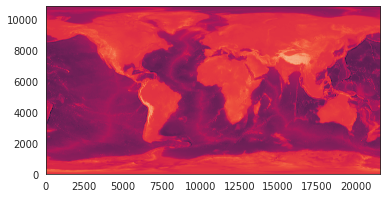

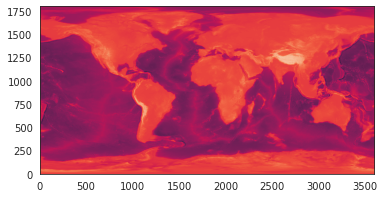

In [38]:
plt.imshow(topography.z.values,origin='lower')
plt.show()
plt.imshow(topography_regrid.z.values,origin='lower')
plt.show()

In [14]:
# TODO: regrid this to 10km x 10 km then we happy

In [15]:
mswep_filepath = '/bp1store/geog-tropical/data/Obs/MSWEP/3hourly_invertlat/2012220.06.nc'
mswep = xr.load_dataset(mswep_filepath)
print(mswep.precipitation.values[0,:,:].shape)
print(topography.z.values.shape)

(1800, 3600)
(10801, 21601)


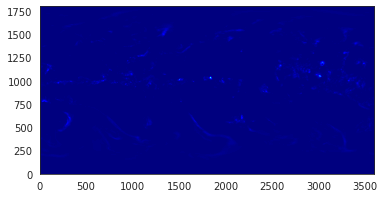

In [14]:
plt.imshow(mswep.precipitation.values[0,:,:],origin='lower',cmap = 'jet')

In [41]:
print(mswep.lat.values)
print(mswep.lon.values)

print(topography_regrid.lat.values)
print(topography_regrid.lon.values)

[-89.95001  -89.850006 -89.75     ...  89.75      89.85      89.95    ]
[-179.95    -179.84999 -179.75    ...  179.75002  179.85002  179.95   ]
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]


In [27]:
# grid_in = xr.Dataset({'longitude': topography.x.values,
# 					'latitude': topography.x.values
# 				})

# grid_out = xr.Dataset({'longitude': mswep.lon.values,
# 					'latitude': mswep.lat.values
# 				})

# regridder = xe.Regridder(grid_in, grid_out, 'nearest_s2d')

# topography_regrid = regridder(topography)

In [ ]:
cat > mygrid << EOF
gridtype = lonlat
xsize    = 3600
ysize    = 1800
xfirst   = -179.95
xinc     = 0.1
yfirst   = -89.95
yinc     = 0.1
EOF

In [ ]:
new_fp = '/user/home/al18709/work/topography/topography_10km_nn.nc'
cdo_cmd = f"cdo  remapnn,targetgrid {fp} {new_fp}"

In [43]:
['/user/home/al18709/work/topography/topography_10km_nn.nc'] * 5

['/user/home/al18709/work/topography/topography_10km_nn.nc',
 '/user/home/al18709/work/topography/topography_10km_nn.nc',
 '/user/home/al18709/work/topography/topography_10km_nn.nc',
 '/user/home/al18709/work/topography/topography_10km_nn.nc',
 '/user/home/al18709/work/topography/topography_10km_nn.nc']